In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


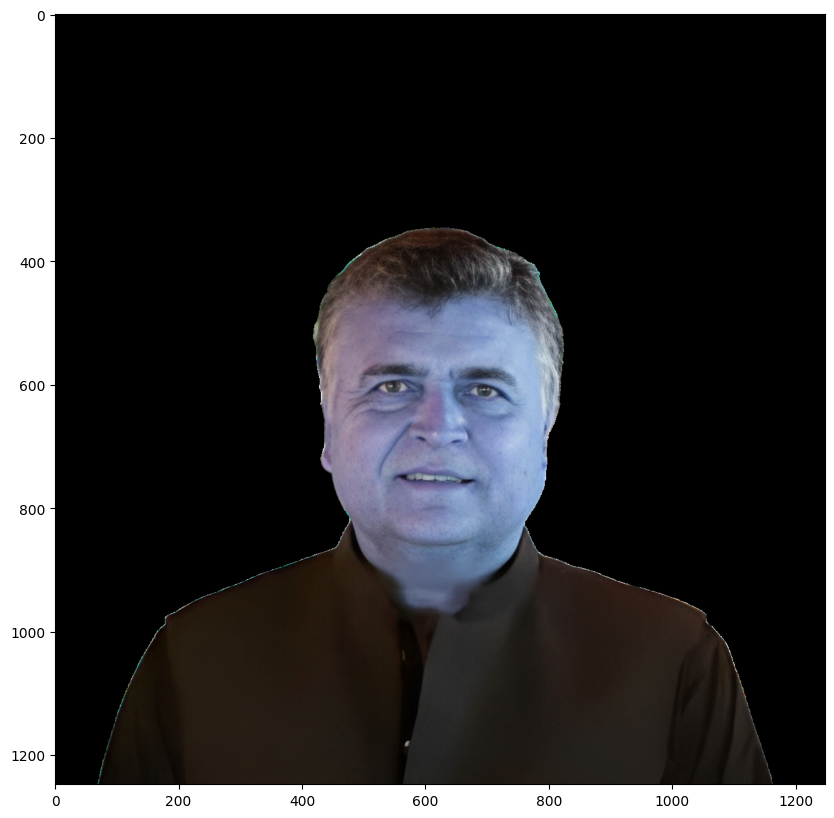

In [16]:
image = cv2.imread('Downloads/man.png')
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()


In [17]:
point1 = (550, 100)
point2 = (200, 900)
point3 = (800, 900)


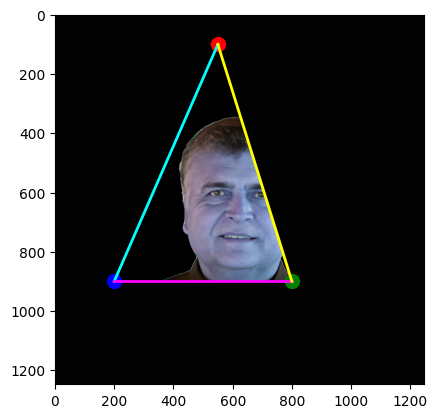

In [20]:
plt.scatter(point1[0], point1[1], color='red', s=100, marker='o', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', s=100, marker='o', label='Point 2')
plt.scatter(point3[0], point3[1], color='green', s=100, marker='o', label='Point 3')
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='cyan', linestyle='-', linewidth=2, label='Side 1-2')
plt.plot([point2[0], point3[0]], [point2[1], point3[1]], color='magenta', linestyle='-', linewidth=2, label='Side 2-3')
plt.plot([point3[0], point1[0]], [point3[1], point1[1]], color='yellow', linestyle='-', linewidth=2, label='Side 3-1')
triangle_vertices = np.array([point1, point2, point3])
mask = np.zeros_like(image[:, :, 0])
cv2.fillPoly(mask, [triangle_vertices], 1)
masked_image = image.copy()
masked_image[mask == 0] = 2

plt.imshow(masked_image)
plt.axis('on')  # Turn off axis
plt.show()


In [21]:
original_points = np.float32([[550, 100], [200, 900], [800, 900]])
new_points = np.float32([[1000, 100], [100, 1000], [200, 200]])
matrix = cv2.getAffineTransform(original_points, new_points)
rows, cols = image.shape[:2]
mask = np.zeros((rows, cols), dtype=np.uint8)
cv2.fillPoly(mask, [original_points.astype(np.int32)], 255)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
transformed_triangle = cv2.warpAffine(image, matrix, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))
transformed_mask = cv2.warpAffine(mask, matrix, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
result = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(transformed_mask))
result = cv2.add(result, transformed_triangle)
cv2.imshow('Stretched Triangular Region', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
